In [1]:
import os
import sys
import math
import time
import datetime
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torchvision.utils
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as dset
import pycocotools.coco as COCO

In [2]:
root_path = './River-Evaluation'
pred_path = root_path + '/papua_imgs/pred_img_bnr'

sys.path.append(root_path)

from util_data import *
from model_base import *
from engine import *

In [3]:
!rm -rf /home/studio-lab-user/sagemaker-studiolab-notebooks/River-Evaluation/papua_imgs/img/.ipynb_checkpoints

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')print("device", device)

eval_model = unetresnet50(3)

eval_checkpoint_name = 'unetresnet50_transfer_adam_512'
eval_checkpoint_path = root_path + '/'+ eval_checkpoint_name +'.pth'

eval_model.load_state_dict(torch.load(eval_checkpoint_path, map_location=torch.device('cpu')))
try:
    eval_model.eval()
    eval_model = eval_model.to(device)
    print("set to eval mode")
except:
    print("error")

device cpu
set to eval mode


In [5]:
resize_size = 512

dataset = dataset_pred(root_path + '/papua_imgs', resize_size)

print('len dataset', len(dataset))

dataloader = torch.utils.data.DataLoader(dataset, 
                                         batch_size = 1, 
                                         shuffle = False, 
                                         num_workers = 4,)

len dataset 7708


pred shape (1, 3, 512, 512)


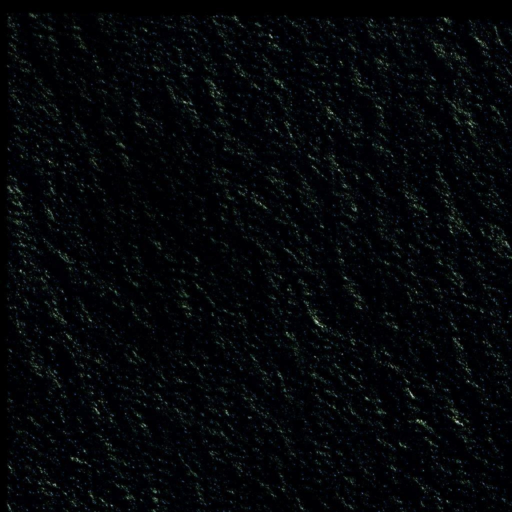

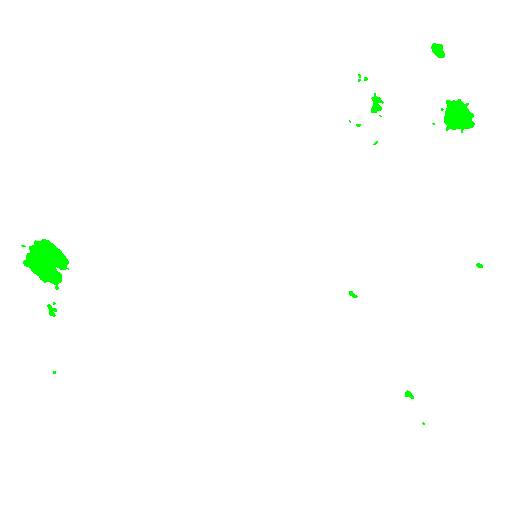

In [6]:
# test
img, img_name = next(iter(dataloader))
img = img.to(device)

pred = eval_model(img)

# The loss functions include the sigmoid function.
pred = torch.sigmoid(pred)
pred = pred.data.cpu().numpy()
print('pred shape', pred.shape)

input_img = reverse_transform(img[0].cpu())
pred_img = masks_to_colorimg(pred[0])

input_img = Image.fromarray(input_img)
input_img = input_img.convert("RGB")
input_img.show()
pred_img = Image.fromarray(pred_img)
pred_img = pred_img.convert("RGB")
pred_img.show()

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

for img, img_name in dataloader:
    img_name = img_name[0]
    img_path = os.path.join(pred_path, img_name)
    if os.path.exists(img_path):
        continue
    else:
        #print(img_name)
        img = torch.tensor(img).to(device)
        
        # get the predicted images
        pred = eval_model(img)
        pred = torch.sigmoid(pred)
        pred = pred.data.cpu().numpy()
        pred_img = masks_to_colorimg(pred[0])
        
        # convert to jpeg and save
        pred_img = Image.fromarray(pred_img)
        pred_img = pred_img.convert("RGB")
        pred_img.save(f'{pred_path}/{img_name}')
        
print('finished')